In [1]:
import pandas as pd


Import books and ratings data from CSV files

In [2]:
df_books_data_large = pd.read_csv("../data/raw/books_data.csv")
df_ratings_data_large = pd.read_csv("../data/raw/Books_rating.csv")

### Let's first analyze df_books_data_large data

In [3]:
df_books_data_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


###### All the columns contain text data except ratingsCount column. Let's quickly check what the actual data looks like in the columns using head command

In [4]:
df_books_data_large.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
df_books_data_large.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


#### Only one numerical column is there - ratingsCount. Clearly 4895 is an outlier. The column has a limited utility and may be removed in the subsequent steps

In [6]:
df_books_data_large.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

#### There are several null values spread across different columns. One null value that we will deal with right now is Title as without it the row is of limited use 

In [7]:
#We will remove the row with missing title as we we don't have any information about that title
df_books_data_large = df_books_data_large[~df_books_data_large['Title'].isna()]

#### We will drop the columns - Image, previewLink, infoLink - as they are not important in developing a book recommendation. Also, we will drop 'ratingsCount' column as most of the values are null and we can generate actual values from the other dataset


In [8]:
df_books_selected_columns = df_books_data_large.drop(['image', 'previewLink', 'infoLink','ratingsCount'],axis=1
)
df_books_selected_columns.head(5)

,Title,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003-03-01,NaN


#### Let's further analyze how the null values are spread across different columns

<Axes: >

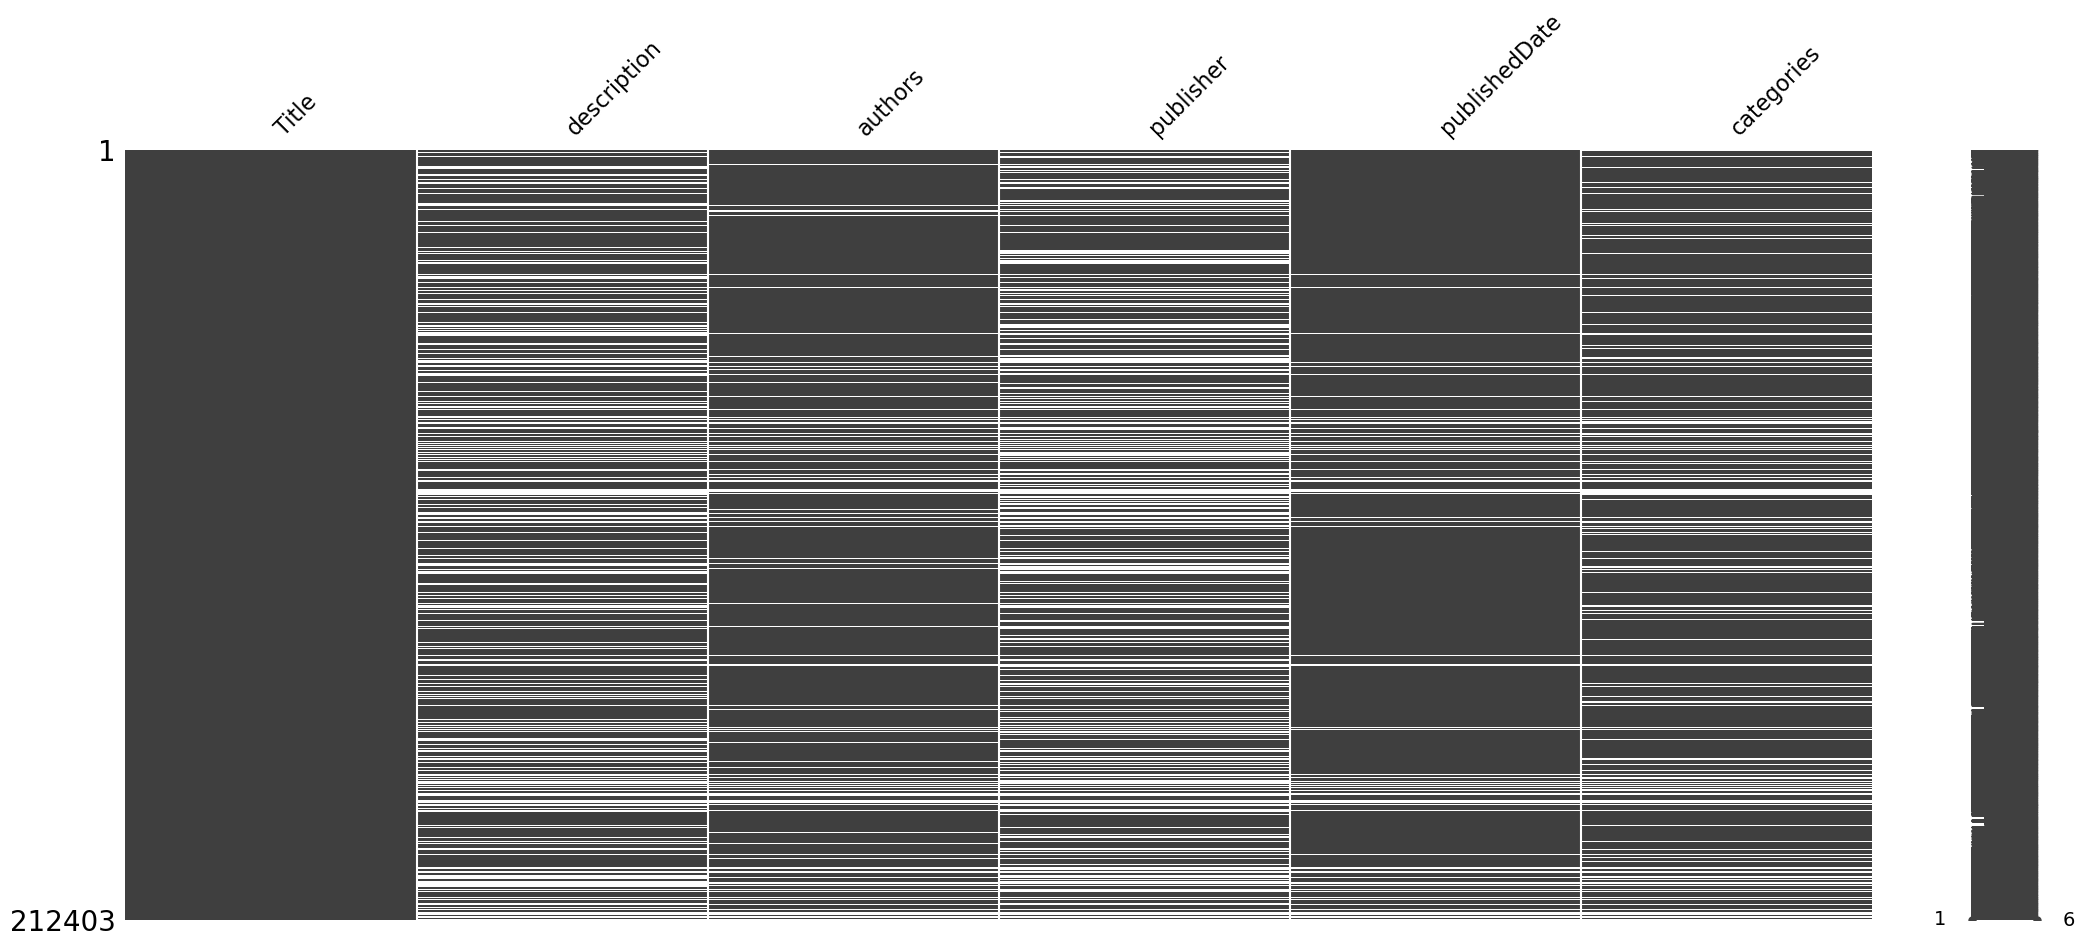

In [9]:
import missingno as msno
%matplotlib inline
msno.matrix(df_books_selected_columns)

#### Still there are many null values in different columns. We will leave them for now. We will now focus on formating the data of individual columns



### There is a clear need to clean the strings in authors and categories column. The first step we need to remove "[]" and " ' "

In [10]:
df_books_selected_columns.authors = df_books_selected_columns.authors.str.strip("[]").str.replace("'","")

For categories column, additionaly we have to splity around " & "

In [11]:
df_books_selected_columns.categories = df_books_selected_columns.categories.str.strip("[]").str.replace("'","").str.split(" & ")

### Given our final goal is to recommend books based on  personalities, book genre data is important for us as we will use it to connect personality type. We will drop all the rows with missing categories as without it our recommendation system will not work initially

In [12]:
df_books_selected_columns = df_books_selected_columns[~df_books_selected_columns.categories.isna()]

In [13]:
df_books_selected_columns.isna().sum()

Title                0
description      33317
authors           5461
publisher        39102
publishedDate      513
categories           0
dtype: int64

### We will now merge all categories lists to have one big list having all categories

In [14]:
all_genres = pd.DataFrame(df_books_selected_columns.categories.sum())

In [15]:
all_genres.value_counts()

Fiction                         23419
Religion                         9459
History                          9330
Juvenile Fiction                 6643
Biography                        6386
                                ...  
Drosophila melanogaster             1
Dropouts                            1
Droit - États-Unis - Langage        1
Drinking vessels                    1
Śaivism                             1
Name: count, Length: 10890, dtype: int64

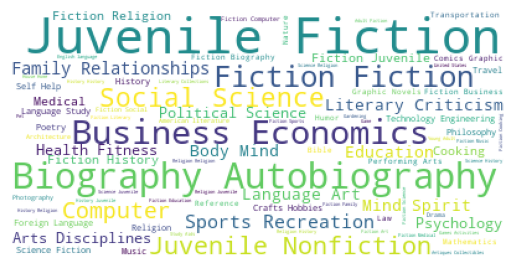

In [17]:
from wordcloud import WordCloud

#wordcloud = WordCloud().generate(" ".join(all_genres[0]))
text = " ".join(all_genres[0])
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(all_genres[0]),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#### We see Juvenile and Fiction appear most often, followed by Biography, Autobiography. 

### Let's analyze the Ratings data now

In [18]:
df_ratings_data_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


### Most of the column are string except review/score and review/time. Review/time column may removed in the subsequent steps. Let's now see what the actual data looks like using head

In [19]:
df_ratings_data_large.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


##### Let's also do a quick describe to further explore the data

In [20]:
df_ratings_data_large.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


### One interesting observation around the reivew/score. It looks like most of the values are 4 or 5. We further explore these values in the EDA stage

#### Let's also see the what the shape of the rating data looks like. 

In [21]:
df_ratings_data_large.shape

(3000000, 10)

###### We have close to 3 MM records, which is huge. We may need to trim down the records in the future but nothing much to be done for now.
###### We will now look for null values in the data set and how they are spread across the data

In [22]:
df_ratings_data_large.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

#### Price has the most null values but it may not be most important feature in the dataset. We have several null values for user_id and profilename column as well. Let's now visualize how the null values are spread across the database

<Axes: >

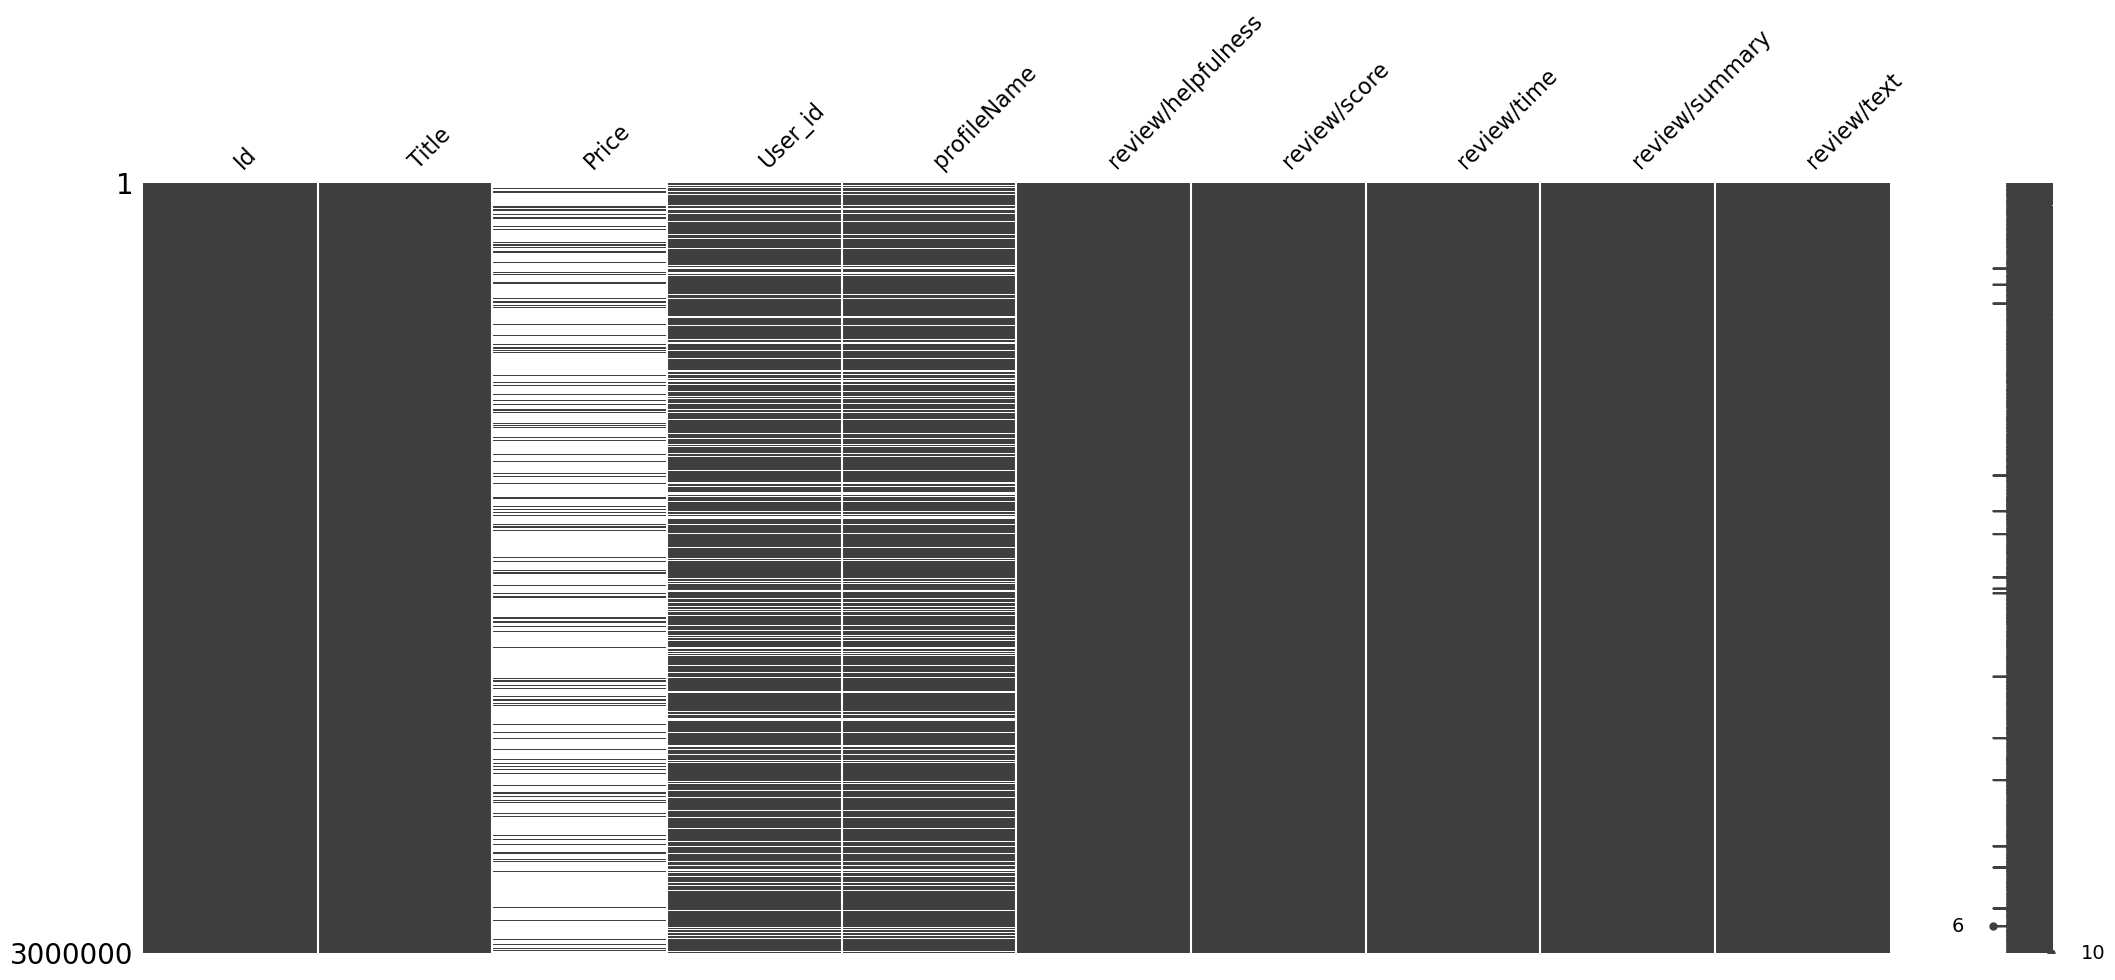

In [23]:
msno.matrix(df_ratings_data_large)

#### As observed before, price data is mostly null so we should drop it.

In [24]:
#Price is mostly null so we will drop the column
df_ratings_data_large = df_ratings_data_large.drop(['Price'],axis=1)

In [25]:
df_ratings_data_large.head(5)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


#### Let's now deep dive in the text data. 

#### First, we will look into review/summary column

In [26]:
df_ratings_data_large["review/summary"].isna().sum()

407

In [27]:
df_ratings_data_large["review/summary"].sample(250)

636697                         An outstanding, classic novel
2608633                    thought provoking and challenging
1235971    If I could have only one cookbook, this would ...
2422460                                Getting back on track
177181                    Clancy when he still had an editor
                                 ...                        
2048824                                        Excellent!!!!
2723457                       Jud's Review on the Fellowship
342125     If you want a quick chew on some brain gum, do...
1542731                                 more than a cookbook
1524433                 Not Your Usual Naval Service Fiction
Name: review/summary, Length: 250, dtype: object

### We see that we need to change the text case and lower the case. We will also remove the punctuation to make the text cleaner

### First, we define a function that removes punctuation and call the function on the column. The function should take care of all the null values as well due to the else part

In [28]:
import string
string.punctuation
def remove_punctuation(text):
    if (isinstance(text, str)):
        punctuationfree="".join([i for i in text if i not in string.punctuation])
        return punctuationfree
    else:
        return ""

In [29]:
df_ratings_data_large["review/summary"] = df_ratings_data_large["review/summary"].apply(lambda x: remove_punctuation(x))

In [30]:
df_ratings_data_large["review/summary"].isna().sum()

0

In [31]:
df_ratings_data_large["review/summary"]= df_ratings_data_large["review/summary"].apply(lambda x: x.lower())

#### Clearly the null values are gone as they should be replaced by empty string. Let's look in a few random samples how the text looks like now.

In [32]:
df_ratings_data_large["review/summary"].sample(250)

2981644                       hilarious adventure down under
839931                             best guide for zelda ever
1687952                               life on a neutron star
2135709                                            good book
1154330                                      not harris best
                                 ...                        
1565565                               thoroughly resourceful
247044                             boot camp in high fashion
2492899                                         from the bbc
1703465    a great summary of the last decade in internat...
1852521              a terrific resource for academic pagans
Name: review/summary, Length: 250, dtype: object

#### Let's take the similar steps for the reivew/text column

In [33]:
df_ratings_data_large["review/text"] = df_ratings_data_large["review/text"].apply(lambda x: remove_punctuation(x))
df_ratings_data_large["review/text"]= df_ratings_data_large["review/text"].apply(lambda x: x.lower())

#### Let's quickly check the review/text data now

In [34]:
df_ratings_data_large["review/text"].isna().sum()

0

In [35]:
df_ratings_data_large["review/text"].sample(250)

1716948    sure most of the book is speculation and conje...
2593798    selected by brandon amp hill nursing outlook m...
955301     i dont recommend this book for anyone in the a...
2369580    the book gives you in comprehensive english a ...
700129     in chance dr aczel had a wonderful idea presen...
                                 ...                        
108652     the print size is too small i wont be reading ...
541132     sue grafton is the best i hope she finishes th...
1073136    get it read it this was a wonderful book that ...
2314319    as usualdana stabenow caught my attention from...
1037419    okay perhaps im just a teensy little bit biase...
Name: review/text, Length: 250, dtype: object

#### Clear the text is much cleaner and all the null values are gone.

#### We won't clean the data any further as it may lead a loss in the information and affect the performance of the language models

##### We will save the data now for the later steps. 

In [36]:
df_books_selected_columns.to_csv("../data/interim/post_wrangling_books_text_tf_new.csv")
df_ratings_data_large.to_csv("../data/interim/post_wrangling_ratings_text_tf.csv")

# Summary
1) I am using Amazon book review data set from Kaggle. Location - https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews. I have not added the data to Git as it is over 1 GB
2) I did a quick review of the dataset and removed columns that will not be needed for developing a recommendation system or performing NLP related tasks
3) I have kept most of the columns and rows for now (even though we have a lot of NAs, as I am not sure what modelling techniques will be used